# MNIST 분류

In [1]:
import torch
import torchvision.datasets as dsets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import torch.nn as nn
import matplotlib.pyplot as plt
import random

In [2]:
USE_CUDA = torch.cuda.is_available()
device = torch.device("cuda" if USE_CUDA else "cpu")
print(device)

cuda


In [3]:
random.seed(777)
torch.manual_seed(777)
if USE_CUDA:
    torch.cuda.manual_seed_all(777)

In [4]:
training_epochs = 15
batch_size = 100

In [5]:
# MNIST dataset
mnist_train = dsets.MNIST(
    root='MNIST_data/',
    train=True,
    transform=transforms.ToTensor(),
    download=True
    )
mnist_test = dsets.MNIST(
    root='MNIST_data/',
    train=False,
    transform=transforms.ToTensor(),
    download=True
)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting MNIST_data/MNIST/raw/train-images-idx3-ubyte.gz to MNIST_data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting MNIST_data/MNIST/raw/train-labels-idx1-ubyte.gz to MNIST_data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting MNIST_data/MNIST/raw/t10k-images-idx3-ubyte.gz to MNIST_data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting MNIST_data/MNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST_data/MNIST/raw



In [6]:
# dataset loader
data_loader = DataLoader(
    dataset=mnist_train,
    batch_size=batch_size,
    shuffle=True,
    drop_last=True
)

In [7]:
# 28 * 28 = 784
# to 변수는 모델의 매개변수를 지정한 장치의 메모리로 보냄
linear = nn.Linear(784, 10, bias=True).to(device) 

In [8]:
# 비용 함수와 옵티마이저 정의
criterion = nn.CrossEntropyLoss().to(device) # nn.functional.cross_entropy()와 동일
optimizer = torch.optim.SGD(linear.parameters(), lr=0.01)

In [9]:
for epoch in range(training_epochs):
    avg_cost = 0
    total_batch = len(data_loader)

    for X, Y in data_loader:
        # 배치 크기 100이므로 X는 (100, 784) 텐서
        X = X.view(-1, 28*28).to(device)
        # 레이블은 원핫 아닌 0~9 정수
        Y = Y.to(device)

        optimizer.zero_grad()
        hypothesis = linear(X)
        cost = criterion(hypothesis, Y)
        cost.backward()
        optimizer.step()

        avg_cost += cost / total_batch
    
    print(f'Epoch: {epoch+1}, Cost: {avg_cost:.9f}')

print('Finished')

Epoch: 1, Cost: 1.146538734
Epoch: 2, Cost: 0.643554091
Epoch: 3, Cost: 0.537018478
Epoch: 4, Cost: 0.485664040
Epoch: 5, Cost: 0.454167128
Epoch: 6, Cost: 0.432450980
Epoch: 7, Cost: 0.416067898
Epoch: 8, Cost: 0.403448164
Epoch: 9, Cost: 0.393017381
Epoch: 10, Cost: 0.384501547
Epoch: 11, Cost: 0.377253085
Epoch: 12, Cost: 0.370864779
Epoch: 13, Cost: 0.365388066
Epoch: 14, Cost: 0.360509843
Epoch: 15, Cost: 0.356154144
Finished


Accuracy: 0.9016000032424927
Label: 9
Prediction: 9


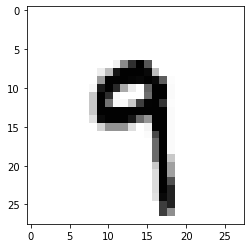

In [13]:
# 모델 테스트
with torch.no_grad(): # gradient 계산 하지 않음
    X_test = mnist_test.test_data.view(-1, 28*28).float().to(device)
    Y_test = mnist_test.test_labels.to(device)

    prediction = linear(X_test)
    correct_prediction = torch.argmax(prediction, 1) == Y_test
    accuracy = correct_prediction.float().mean()
    print('Accuracy:', accuracy.item())

    # 예측 결과 확인
    r = random.randint(0, len(mnist_test) - 1)
    X_single_data = mnist_test.test_data[r:r+1].view(-1, 28*28).float().to(device)
    Y_single_data = mnist_test.test_labels[r:r+1].to(device)

    print('Label:', Y_single_data.item())
    print('Prediction:', torch.argmax(linear(X_single_data), 1).item())

    plt.imshow(X_single_data.detach().cpu().view(28, 28), cmap='Greys', interpolation='nearest')
    plt.show()